# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observed Trends:
* Max temperatures are distinctly higher near the equator.
* Max temperatures are typically higher in the northern hemisphere than the southern hemisphere (arid regions in the Sahara Desert and Middle East are even warmer than the equatorial zone).
* There are no clear trends observed with respect to humidity, cloudiness, and wind speed relative to latitude from the data.  It would probably be more beneficial to compare average values of these measures than measures taken at a specific point in time.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
search_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in search_cities:
        search_cities.append(city)

# Print the city count to confirm sufficient count
len(search_cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
units = "metric"
url = (f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q=")

In [4]:
# Set up lists to hold reponse info
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# Counter for records found
record_count = 0
# Counter for processing records
i = 0

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for cities in search_cities:
    i = i + 1
    query = url + cities
    response = requests.get(query).json()
    try:
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record_count = record_count + 1
        print(f"Processing record {i} | {search_cities[i]}")
    except:
        print(f"City not found. Skipping...")
print(f"Data for {record_count} cities has been retrieved.")

Beginning Data Retrieval
-----------------------------
Processing record 1 | hikari
Processing record 2 | mataura
Processing record 3 | finnsnes
Processing record 4 | port elizabeth
Processing record 5 | tezu
Processing record 6 | taolanaro
City not found. Skipping...
Processing record 8 | saint-philippe
Processing record 9 | narsaq
Processing record 10 | vanavara
Processing record 11 | gevrai
Processing record 12 | vaini
Processing record 13 | nanakuli
Processing record 14 | hudiksvall
Processing record 15 | bambous virieux
Processing record 16 | waddan
Processing record 17 | bandarbeyla
Processing record 18 | puerto carreno
Processing record 19 | cayenne
Processing record 20 | illoqqortoormiut
City not found. Skipping...
Processing record 22 | itarema
Processing record 23 | sa kaeo
Processing record 24 | carnarvon
Processing record 25 | andreapol
Processing record 26 | hobart
Processing record 27 | meyungs
City not found. Skipping...
City not found. Skipping...
Processing record 30 |

Processing record 250 | zyryanka
Processing record 251 | villach
Processing record 252 | cuiluan
Processing record 253 | gillette
Processing record 254 | sentyabrskiy
City not found. Skipping...
Processing record 256 | tromso
Processing record 257 | camocim
Processing record 258 | leningradskiy
Processing record 259 | lagoa
Processing record 260 | kamenskoye
City not found. Skipping...
Processing record 262 | srandakan
Processing record 263 | anloga
Processing record 264 | aldan
Processing record 265 | asau
Processing record 266 | makokou
Processing record 267 | ketchikan
Processing record 268 | taman
Processing record 269 | suoyarvi
Processing record 270 | severo-yeniseyskiy
Processing record 271 | alberdi
Processing record 272 | attawapiskat
City not found. Skipping...
Processing record 274 | ituni
City not found. Skipping...
Processing record 276 | alotau
City not found. Skipping...
City not found. Skipping...
Processing record 279 | jega
Processing record 280 | aykhal
Processing re

Processing record 501 | kilindoni
Processing record 502 | tarudant
City not found. Skipping...
Processing record 504 | klyuchi
Processing record 505 | yartsevo
Processing record 506 | samusu
City not found. Skipping...
Processing record 508 | caraballeda
Processing record 509 | tigbao
Processing record 510 | rinconada
Processing record 511 | zacatepec
Processing record 512 | lancut
Processing record 513 | bouafle
Processing record 514 | mangrol
Processing record 515 | abu samrah
Processing record 516 | ranong
Processing record 517 | road town
Processing record 518 | matamoros
Processing record 519 | salalah
Processing record 520 | shieli
Processing record 521 | praia da vitoria
Processing record 522 | rocha
Processing record 523 | sinnamary
Processing record 524 | winnemucca
Processing record 525 | dunedin
Processing record 526 | mount gambier
Processing record 527 | ca mau
Processing record 528 | meadow lake
Processing record 529 | sayanskiy
City not found. Skipping...
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create the DataFrame
city_data = {"City": city, "Country": country, "Lat": lat, "Long": lng, "Max Temp": max_temp, 
             "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Date": date
            }
city_df = pd.DataFrame(city_data)

# Save the DataFrame to .csv
city_df.to_csv("output_data\cities.csv")

# Show the first 5 lines of the DataFrame
city_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Rikitea,PF,-23.12,-134.97,21.27,79,0,8.73,1595796109
1,Hikari,JP,33.95,131.95,24.00,94,75,4.10,1595796109
2,Mataura,NZ,-46.19,168.86,3.89,83,0,1.34,1595796110
3,Finnsnes,NO,69.23,17.98,16.00,63,20,8.70,1595796110
4,Port Elizabeth,ZA,-33.92,25.57,13.00,87,62,3.10,1595796110


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_df = city_df.loc[(city_df["Humidity"] <= 100)]
clean_df
# No cities in the DataFrame have > 100 % humidity

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Rikitea,PF,-23.12,-134.97,21.27,79,0,8.73,1595796109
1,Hikari,JP,33.95,131.95,24.00,94,75,4.10,1595796109
2,Mataura,NZ,-46.19,168.86,3.89,83,0,1.34,1595796110
3,Finnsnes,NO,69.23,17.98,16.00,63,20,8.70,1595796110
4,Port Elizabeth,ZA,-33.92,25.57,13.00,87,62,3.10,1595796110
...,...,...,...,...,...,...,...,...,...
566,Araouane,ML,18.90,-3.53,36.91,29,66,2.42,1595796177
567,Bua Yai,TH,15.59,102.43,26.87,74,100,3.14,1595796178
568,Donskoye,RU,45.46,41.97,23.00,40,5,6.00,1595796178
569,Sorsk,RU,54.00,90.25,12.73,88,100,8.84,1595796178


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

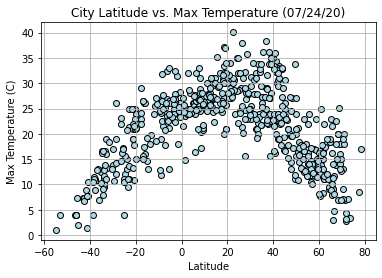

In [7]:
# Define axes
x_latvtemp = list(clean_df["Lat"])
y_latvtemp = list(clean_df["Max Temp"])

# Plot setup
plt.scatter(x_latvtemp, y_latvtemp, color = 'lightblue', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (07/24/20)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

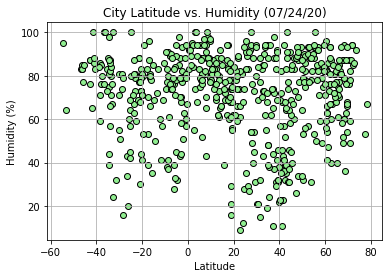

In [8]:
# Define axes
x_latvhumidity = list(clean_df["Lat"])
y_latvhumidity = list(clean_df["Humidity"])

# Plot setup
plt.scatter(x_latvhumidity, y_latvhumidity, color = 'lightgreen', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (07/24/20)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

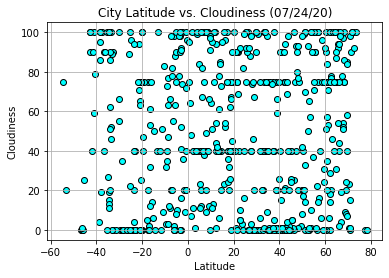

In [9]:
# Define axes
x_latvclouds = list(clean_df["Lat"])
y_latvclouds = list(clean_df["Cloudiness"])

# Plot setup
plt.scatter(x_latvclouds, y_latvclouds, color = 'aqua', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (07/24/20)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

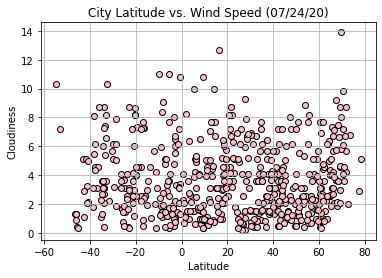

In [10]:
# Define axes
x_latvwind = list(clean_df["Lat"])
y_latvwind = list(clean_df["Wind Speed"])

# Plot setup
plt.scatter(x_latvwind, y_latvwind, color = 'pink', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Wind Speed (07/24/20)")
plt.grid()
plt.show()

## Linear Regression

In [11]:
# Create bins for the data
bins = [-90, 0, 90]
bin_names = ["Southern", "Northern"]
bin_df = clean_df
bin_df["Hemisphere"] = pd.cut(bin_df["Lat"], bins, labels=bin_names, include_lowest=True)
bin_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Hemisphere
0,Rikitea,PF,-23.12,-134.97,21.27,79,0,8.73,1595796109,Southern
1,Hikari,JP,33.95,131.95,24.00,94,75,4.10,1595796109,Northern
2,Mataura,NZ,-46.19,168.86,3.89,83,0,1.34,1595796110,Southern
3,Finnsnes,NO,69.23,17.98,16.00,63,20,8.70,1595796110,Northern
4,Port Elizabeth,ZA,-33.92,25.57,13.00,87,62,3.10,1595796110,Southern


The r-squared is: 0.68


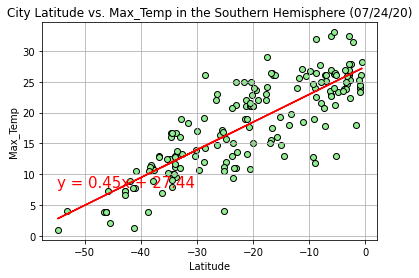

The r-squared is: 0.02


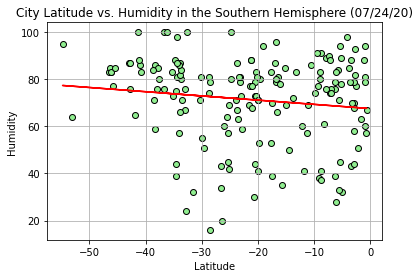

The r-squared is: 0.0


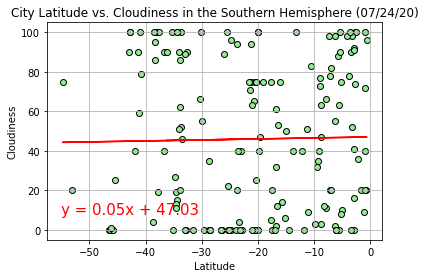

The r-squared is: 0.0


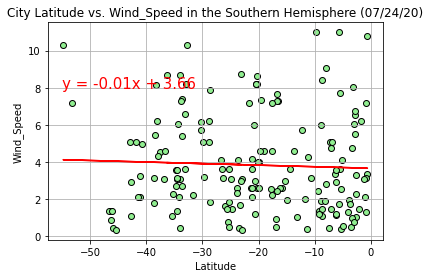

The r-squared is: 0.45


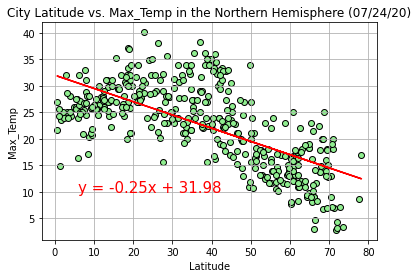

The r-squared is: 0.0


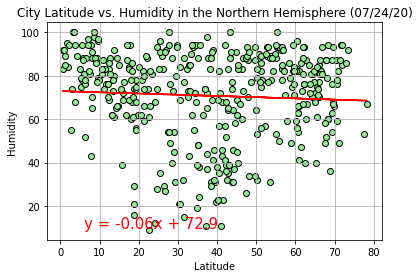

The r-squared is: 0.0


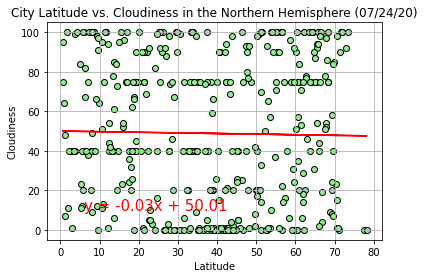

The r-squared is: 0.01


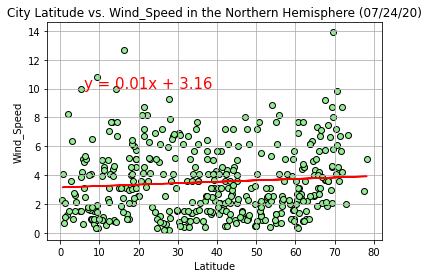

In [12]:
# Create lists to hold y axis data (for plotting)
lat_list = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []

# Create a list of y axis names
y_list = ["Max_Temp", "Humidity", "Cloudiness", "Wind_Speed"]

# Loop to separate data into regions
for bins in bin_names: 

    # Return lat coordinates for a region
    lat_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Lat"]

    # Loop again to get data for each criteria per region
    for y in y_list:
        if y == "Max_Temp":
            temp_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Max Temp"]
        elif y == "Humidity":
            humid_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Humidity"]
        elif y == "Cloudiness":
            cloud_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Cloudiness"]
        elif y == "Wind_Speed":
            wind_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Wind Speed"]
    
    # Now that lists are complete, loop again to create plots
    for y in y_list:
        
        # Define x axis
        x_axis = lat_list
        
        # Define y axis
        if y == "Max_Temp":
            y_axis = temp_list
        elif y == "Humidity":
            y_axis = humid_list
        elif y == "Cloudiness":
            y_axis = cloud_list
        elif y == "Wind_Speed":
            y_axis = wind_list

        # Plot setup
        plt.scatter(x_axis, y_axis, color = 'lightgreen', edgecolors='black')
        plt.xlabel("Latitude")
        plt.ylabel(y)
        plt.title(f"City Latitude vs. {y} in the {bins} Hemisphere (07/24/20)")
        plt.grid()

        # Do linear regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
        regress_values = x_axis * slope + intercept
        plt.plot(x_axis, regress_values, "r-")
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        rsq = round(x_axis.corr(y_axis)**2,2)
        if bins == "Southern":
            plt.annotate(line_eq,(-55, 8),fontsize=15,color="red")
        elif bins == "Northern":
            plt.annotate(line_eq,(6, 10),fontsize=15,color="red")
        print(f"The r-squared is: {rsq}")
        plt.savefig(f"output_data\{bins}_Hemisphere_{y}.png")
        plt.show()